In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df= pd.read_csv("Ads_CTR_Optimisation.csv")
print(df.shape)

class ThompsonAgent(object):
    
    def __init__(self, data, N= 10000):
        self.database= data
        self.N= N
        self.d= data.shape[1]
        self.arms= []
        self.number_rewards_1= [0] * self.d
        self.number_rewards_0= [0] * self.d
        self.total_reward=0

    def act(self):
        import random

        for n in range(0, self.N):
            ad=0
            max_random=0
            for i in range(0, self.d):
                random_beta= random.betavariate(self.number_rewards_1[i] + 1, self.number_rewards_0[i] + 1)
                if random_beta> max_random:
                    max_random= random_beta
                    ad= i
            self.arms.append(ad)
            reward= self.database.values[n, ad]
            
            if reward==1:
                self.number_rewards_1[ad] += 1
            else:
                self.number_rewards_0[ad] += 1

            self.total_reward += reward
    def plot_history(self, title='Histogram of ads selections'):

        plt.hist(self.arms)
        plt.title(title)
        plt.xlabel('Ads')
        plt.ylabel('Number of times each ad was selected')
        plt.show()

(10000, 10)


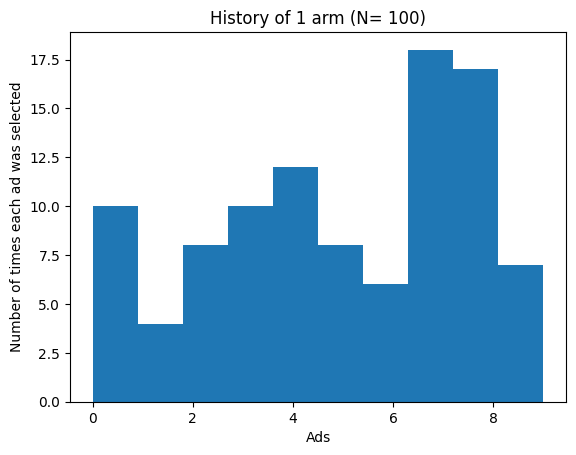

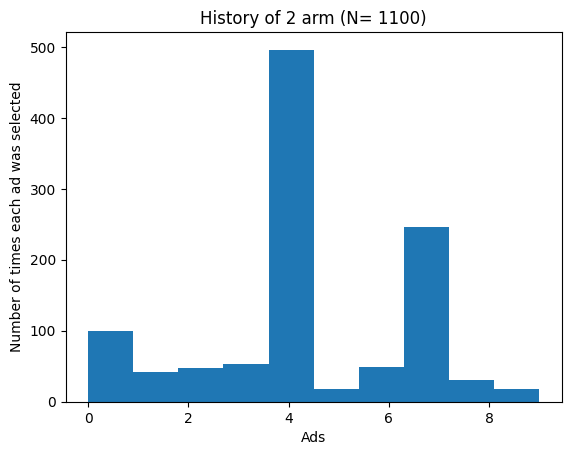

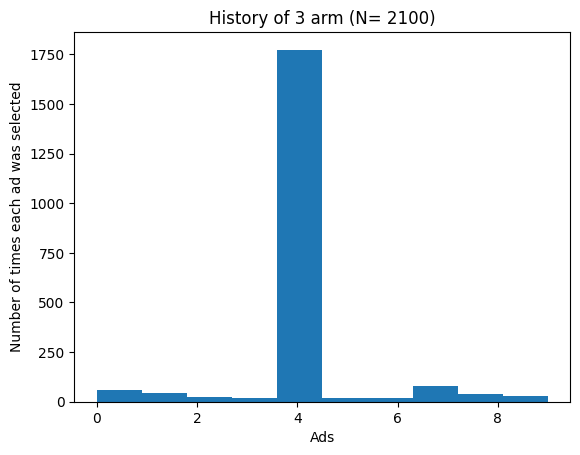

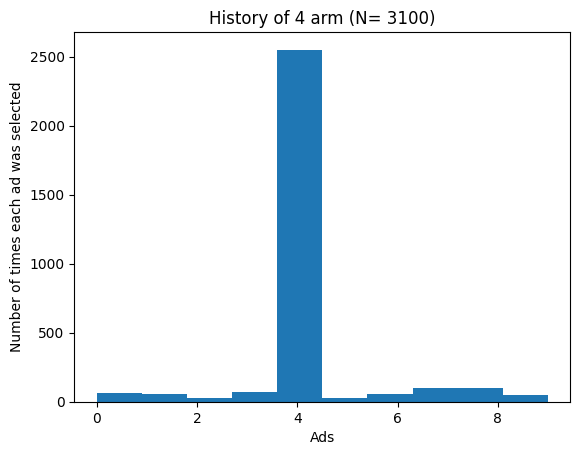

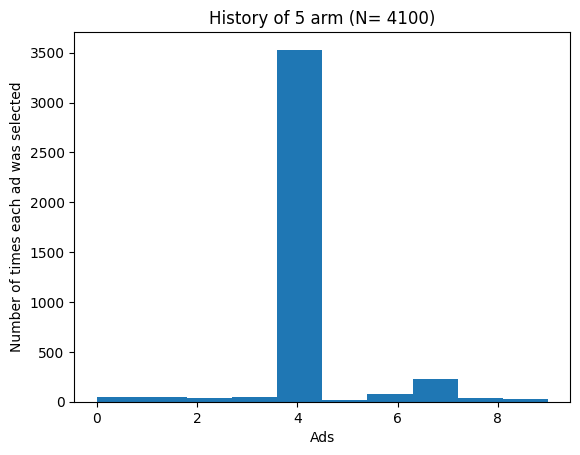

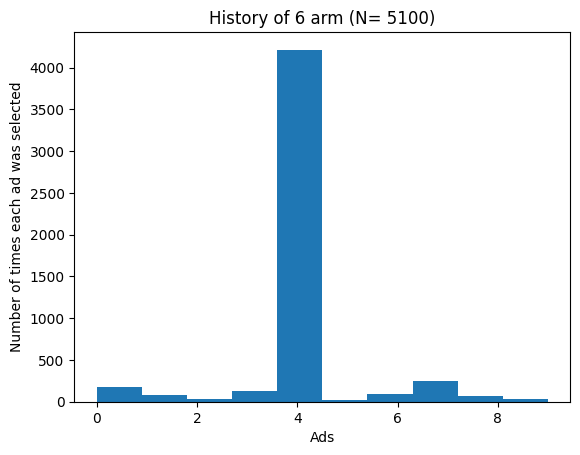

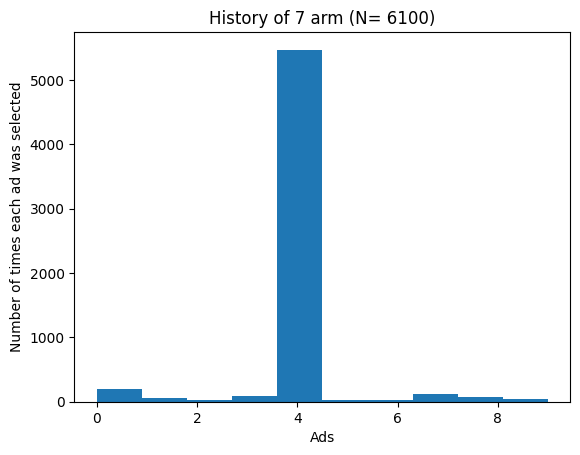

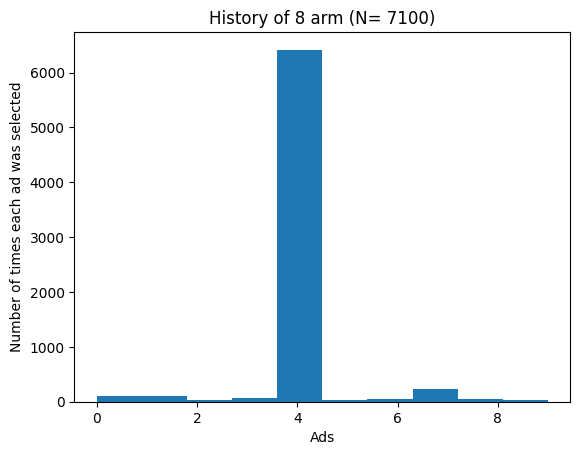

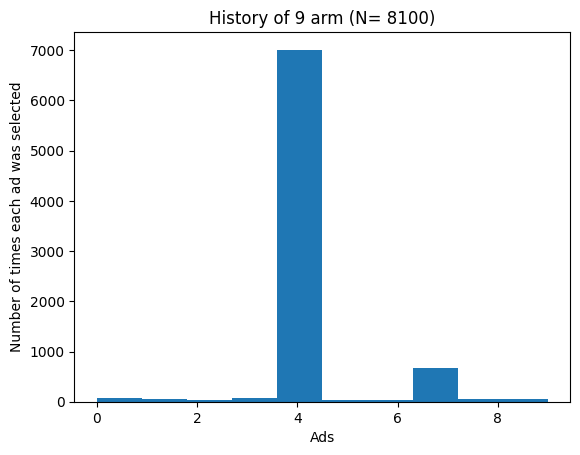

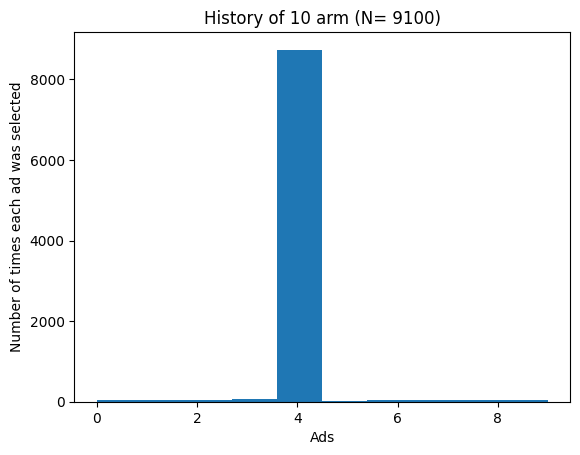

In [5]:
cont=0
for c in range(100, 10000, 1000):
    agent= ThompsonAgent(df, N= c)
    agent.act()
    agent.plot_history(f"History of {cont+1} arm (N= {c})")
    cont +=1